# Data Visualization Project

Open:FactSet Insights and Analysis team.  

The team mission is to educate, inspire, and empower FactSetters and clients to utilize Open:FactSet Data and Solutions.  

As part of the team you will be tasked with creating and communicating compelling stories for Marketplace content.  Secondarily, the team collective will need to develop best practices and methods for disseminating knowledge both internally and externally.  For the interview please prepare a 20-30 minute presentation covering:

1. For an audience of CTS Sales, create a presentation showcasing a FactSet content set using Python, R, or SQL.  The goal is to educate on potential applications, how a given technology is applied and how to pitch this to their client base. 
    - Python, Jupyter Notebook, Ondemand?, 
    - Unique Datasets - RBICs + ESG Data
    - Exploratory Data Analysis
    - Hans Rosling Chart



2. Present an idea of how the Insights and Analysis team can approach educating, inspiring, or empowering FactSetters and clients in FY19.  
    - Code-along programs
    - package together internet resources for people interested in learning
    - Newsletters + sharing of code, methodology, and data.  Make sure it's error-free documentation
    - Github for sharing and distributing across the firm
    - Get all teams involved in Machine Learning involved in an initiative to teach Data Science and Analysis techniques across the firm
    - Phase 1 team - Jupyter, Publish in Marketplace, Story-telling with EDA
    - Phase 2 team - d3.js - more interactive datavisualization tools
    - Conferences: Jupyter Conference, Tableau Conference, etc...
    - FactSet Surveys to collect unique content



Create a Hans Rosling Chart.

Hypothesis:
- Analyze the impact of ESG Data, Market Cap, and Revenue on S&P500 stocks against other companies in the same revere classification
- does the Rich get richer while the Poor get poorer?
- Hypothesize that the growth of FAANG has meant areas of growth for other companies in their Revere Sectors


Extract and Perform EDA
- Scatter Plot data points = Company
- X = **Revenue**, Growth Rate
- Y = # of Employees, Revenue, **GDPR**

- Time Series - plotted individually
- Size = Market Capitalization
- Color = Revere Classification

# Importing Data

In [16]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
#Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

In [18]:
data  = Path('.', 'assets', 'rbics_esg_data_m.csv')
hans_rosling = pd.read_csv(data, na_values= '@NA')

# Cleaning Data

In [19]:
hans_rosling = hans_rosling.dropna()

In [20]:
hans_rosling.shape

(4972, 24)

In [21]:
hans_rosling.columns

Index(['Symbol', 'Name', 'Date', 'mkt_val', 'rbics_econn', 'rbics_econ',
       'rbics_sectn', 'rbics_sect', 'rbics_subsectn', 'rbics_subsect',
       'rbics_indgrpn', 'rbics_indgrp', 'rbics_indn', 'rbics_ind',
       'rbics_subindn', 'rbics_subind', 'msci_esg_env', 'msci_esg_gov',
       'msci_esg_social', 'sales_total', 'sales_ps', 'sales_growth',
       'MSCI ESG Ovr Score', 'MSCI ESG Ovr Score.1'],
      dtype='object')

In [22]:
hans_rosling.columns = ['Symbol', 'Name', 'Date', 'mkt_val', 'rbics_econn', 'rbics_econ',
       'rbics_sectn', 'rbics_sect', 'rbics_subsectn', 'rbics_subsect',
       'rbics_indgrpn', 'rbics_indgrp', 'rbics_indn', 'rbics_ind',
       'rbics_subindn', 'rbics_subind', 'msci_esg_env', 'msci_esg_gov',
       'msci_esg_social', 'sales_total', 'sales_ps', 'sales_growth',
       'msci_esg_score', 'msci_esg_rating']

In [23]:
hans_rosling.describe()

,mkt_val,rbics_econn,rbics_sectn,rbics_subsectn,rbics_indgrpn,rbics_indn,rbics_subindn,msci_esg_env,msci_esg_gov,msci_esg_social,sales_total,sales_ps,sales_growth,msci_esg_score
count,4972.000000,4972.000000,4972.000000,4972.000000,4.972000e+03,4.972000e+03,4.972000e+03,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000
mean,32511.982434,37.843926,3798.945093,379909.400644,3.799096e+07,3.799096e+09,3.799094e+11,5.221933,5.545800,4.646253,20814.713509,44.925058,5.695082,4.514479
std,58087.294335,14.464817,1445.823520,144582.865285,1.445829e+07,1.445829e+09,1.445829e+11,2.064643,1.998769,1.759960,38996.157887,89.495205,21.501600,2.320093
min,488.724000,10.000000,1010.000000,101010.000000,1.010101e+07,1.010101e+09,1.010100e+11,0.000000,0.000000,0.000000,533.901000,1.528933,-78.120102,0.000000
25%,8068.914740,30.000000,3010.000000,301020.000000,3.010201e+07,3.010201e+09,3.010200e+11,3.900000,4.300000,3.450000,4183.625000,14.100850,-1.845707,2.860000
50%,14539.924795,35.000000,3520.000000,352015.000000,3.520151e+07,3.520151e+09,3.520150e+11,5.100000,5.300000,4.620000,8819.834500,25.681550,4.281068,4.400000
75%,30151.421900,50.000000,5015.000000,501515.000000,5.015152e+07,5.015152e+09,5.015150e+11,6.500000,6.620000,5.780000,18760.000000,47.227915,11.056204,6.060000
max,859967.798700,65.000000,6510.000000,651015.000000,6.510152e+07,6.510152e+09,6.510150e+11,10.000000,10.000000,10.000000,495012.000000,2589.251212,846.495580,10.000000


# Feature Engineering

- Mapping RBICS Classification to Colors
- Combine ESG Data


In [24]:
# RBICS Econonmic Focus Color Map 
# source:  https://matplotlib.org/2.0.2/examples/color/named_colors.html

econ_color_dict = {
    'Non-Energy Materials': 'black', 
    'Industrials': 'white', 
    'Healthcare': 'gray', 
    'Technology': 'red',
    'Consumer Cyclicals': 'orange', 
    'Utilities': 'yellow', 
    'Finance': 'green',
    'Consumer Non-Cyclicals': 'blue', 
    'Energy': 'indigo', 
    'Telecommunications': 'violet',
    'Business Services': 'pink', 
    'Consumer Services': 'chocolate'
    
}

In [25]:
# RBICS Sector Focus Color Map
# source:  https://matplotlib.org/2.0.2/examples/color/named_colors.html

sect_color_dict = {
    'Manufactured Products': 'black', 
    'Industrial Manufacturing': 'white',
    'Healthcare Equipment': 'lightgray', 
    'Biopharmaceuticals': 'gray',
    'Software and Consulting': 'red', 
    'Miscellaneous Retail': 'darkorange',
    'Electronic Components and Manufacturing': 'darkred', 
    'Utilities': 'yellow',
    'Healthcare Services': 'silver', 
    'Investment Services': 'lawngreen', 
    'Insurance': 'green',
    'Chemical, Plastic and Rubber Materials': 'k', 
    'Real Estate': 'seagreen',
    'Mining and Mineral Products': 'dimgray', 
    'Specialty Finance and Services': 'darkolivegreen',
    'Food and Tobacco Production': 'blue', 
    'Food and Staples Retail': 'dodgerblue',
    'Industrial Services': 'whitesmoke', 
    'Upstream Energy': 'indigo',
    'Downstream and Midstream Energy': 'blueviolet', 
    'Hardware': 'firebrick',
    'Consumer Vehicles and Parts': 'peachpuff', 
    'Telecommunications': 'violet',
    'Business Services': 'pink', 
    'Banking': 'forestgreen', 
    'Consumer Retail': 'orange',
    'Hospitality Services': 'sienna', 
    'Media and Publishing Services': 'saddlebrown',
    'Household Products': 'navy', 
    'Household Services': 'royalblue',
    'Consumer Goods': 'sandybrown'
    
}

In [28]:
# Sum ESG Scores for Environment + Social + Government
hans_rosling.loc[:, 'rbics_sect_color'] = hans_rosling.loc[:, 'rbics_sect'].map(sect_color_dict)

#hans_rosling.loc[:, 'esg_combined'] = hans_rosling.loc[:, ['msci_esg_env','msci_esg_social', 'msci_esg_gov']].sum(axis=1)

In [29]:
hans_rosling

,Symbol,Name,Date,mkt_val,rbics_econn,rbics_econ,rbics_sectn,rbics_sect,rbics_subsectn,rbics_subsect,...,rbics_subind,msci_esg_env,msci_esg_gov,msci_esg_social,sales_total,sales_ps,sales_growth,msci_esg_score,msci_esg_rating,rbics_sect_color
0,MMM,3M Company,12/31/2007,59796.036530,45.0,Non-Energy Materials,4520.0,Manufactured Products,452020.0,Other Materials,...,Diversified Materials,4.26,5.75,6.61,24462.000,33.418033,6.713781,7.15,AA,black
1,ABT,Abbott Laboratories,12/31/2007,87027.454360,35.0,Healthcare,3510.0,Biopharmaceuticals,351015.0,Other Biopharmaceuticals,...,Diversified Biopharmaceuticals,5.69,5.33,5.26,25258.961,16.611084,15.478363,4.57,BBB,gray
2,ANF,Abercrombie & Fitch Co. Class A,12/31/2007,6881.258560,20.0,Consumer Cyclicals,2025.0,Consumer Retail,202510.0,Apparel and Accessories Retail,...,Teen/Young Adults Apparel and Accessories Retail,2.97,4.12,3.18,3659.621,36.063015,16.518493,1.43,B,orange
3,CB,ACE Limited,12/31/2007,20369.145930,30.0,Finance,3015.0,Insurance,301510.0,Insurance,...,Diversified Commercial Insurance,4.99,5.37,6.13,14350.000,43.247386,5.685668,6.03,A,green
4,ADBE,Adobe Systems Incorporated,12/31/2007,24416.306570,55.0,Technology,5520.0,Software and Consulting,552015.0,Software,...,Multimedia Design and Engineering Software,5.50,6.41,7.97,3157.881,5.264700,22.862078,5.40,BBB,red
5,AMD,"Advanced Micro Devices, Inc.",12/31/2007,4492.500000,55.0,Technology,5510.0,Electronic Components and Manufacturing,551020.0,Semiconductor Manufacturing,...,Microprocessor (MPU) Semiconductors,8.50,8.33,9.28,6013.000,10.775986,6.440849,10.00,AAA,darkred
6,AES,AES Corporation,12/31/2007,14338.569500,65.0,Utilities,6510.0,Utilities,651010.0,Energy Utilities,...,Multinational Wholesale Power,4.41,3.93,5.04,13601.000,20.041298,13.663714,3.64,BB,yellow
7,AET,Aetna Inc.,12/31/2007,28651.399000,35.0,Healthcare,3515.0,Healthcare Services,351510.0,Healthcare Support Services,...,Other Managed Care,4.52,9.00,6.89,27724.500,52.608349,10.255431,8.51,AA,silver
8,ACS,Affiliated Computer Services Inc. Cl A,12/31/2007,4328.427400,10.0,Business Services,1010.0,Business Services,101015.0,Other Professional Services,...,Diverse Business Process Outsourcing Services,3.04,2.52,5.87,5964.805,56.831400,8.306145,4.28,BB,pink
9,AFL,Aflac Incorporated,12/31/2007,30471.373900,30.0,Finance,3015.0,Insurance,301510.0,Insurance,...,Other Supplemental Health Insurance,4.49,4.15,4.83,15393.000,15.604155,5.323298,4.48,BBB,green


# Hans Rosling Function
Create a function that accepts year-end dates and plots a scatter chart

In [30]:
## Define a function that filters the dataframe by date  

def hans_rosling_date(year):
    #Define a function that creates a scatter plot based on x = esg_score, y = sales_total, size = mkt_val, color = rbics_sector
    
    # Define a function that filters the dataframe by date    
    date_filter = hans_rosling.loc[:, 'Date'] == year
    hans_rosling_year = hans_rosling.loc[date_filter, :]
    
    
    #store values into array variables for scatter plot
    esg_score = hans_rosling_year.loc[:, 'msci_esg_score']
    sales = hans_rosling_year.loc[:, 'sales_total']
    mktval = hans_rosling_year.loc[:, 'mkt_val']
    rbics = hans_rosling_year.loc[:, 'rbics_econ']
    rbics_color = hans_rosling_year.loc[:, 'rbics_sect_color']
    ticker = hans_rosling_year.loc[:, 'Symbol']
    
    # Store Symbol and coordinates for select Companies into a dictionary
    # Dictionary is used for better error handling when Company does not exist in the chart
    my_dict = {}

    for symbol in ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'BRK.B', 'WMT', 'XOM',
                   ]:
        symbol_filter = hans_rosling_year.loc[:, 'Symbol'] == symbol
        label = np.array((hans_rosling_year.loc[symbol_filter, ['msci_esg_score', 'sales_total']]))
        if label.size >1:
            my_dict.update({symbol: (label[0][0], label[0][1])})
    
    
    # Scatter plot
    plt.scatter(x = esg_score, y = sales, s = mktval/100 , edgecolors='black', c = rbics_color, alpha=.75)

    
    # customizations
    plt.yscale('log')
    plt.xlabel('ESG Score')
    plt.ylabel('Revenue')
    plt.xlim(-1,11)
    plt.ylim(500, 700000)
    plt.title(year)
    plt.yticks([1000,10000,100000], ['1m','10m','100m'])

    
    # Adding Labels for Symbol, ESG score, and Sales Total
    for key, value in my_dict.items():
        plt.text(value[0], value[1], key)
    
    
    # Add grid() 
    plt.grid(True)

    
    # return and display the plot
    return plt.show()


In [38]:
hans_rosling.Date.unique()

array(['12/31/2007', '12/31/2008', '12/31/2009', '12/31/2010',
       '12/30/2011', '12/31/2012', '12/31/2013', '12/31/2014',
       '12/31/2015', '12/30/2016', '12/29/2017'], dtype=object)

# Hans Rosling Chart
Viewing the Results from 2007 - 2017

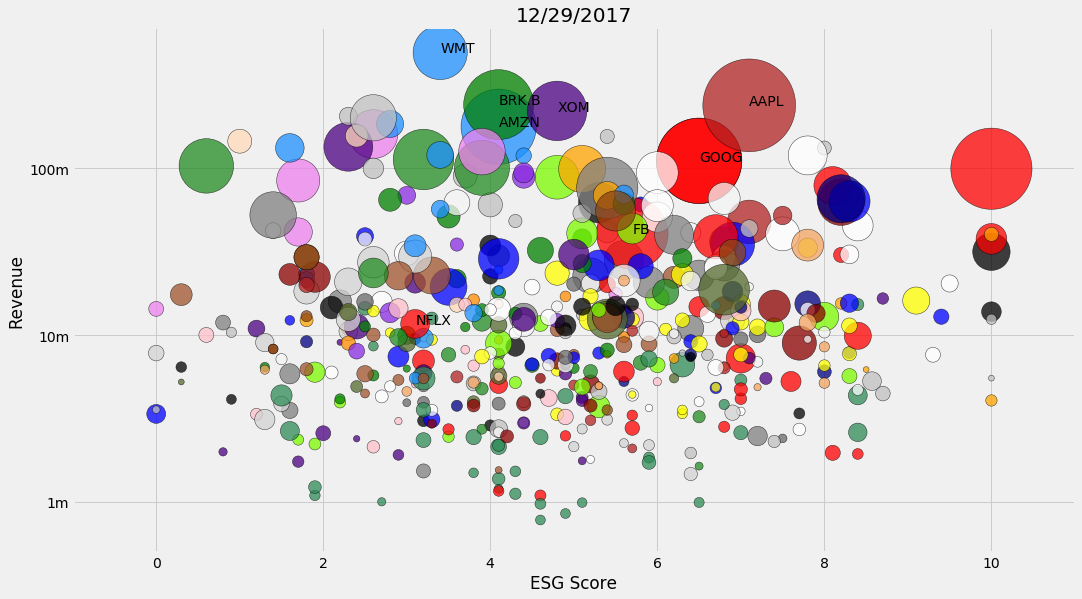

In [31]:
hans_rosling_date('12/29/2017')

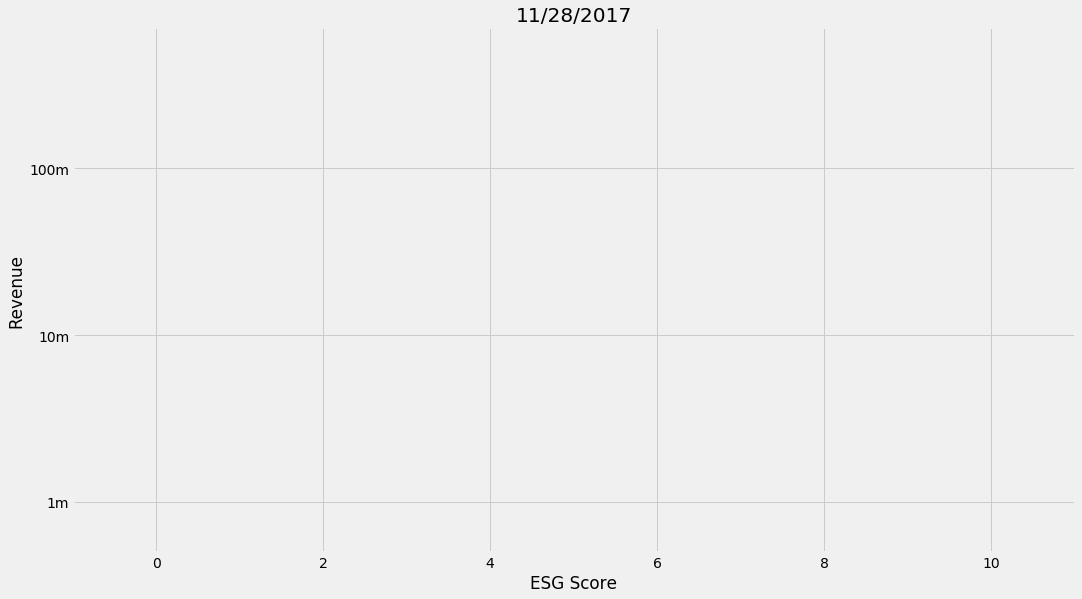

In [35]:
hans_rosling_date('11/28/2017')

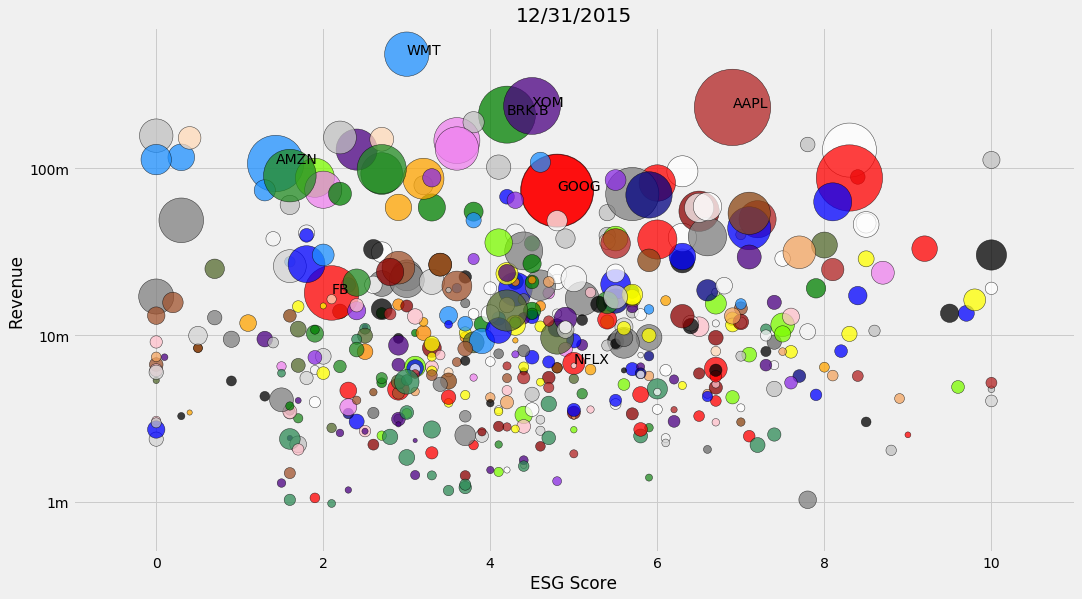

In [28]:
hans_rosling_date('12/31/2015')

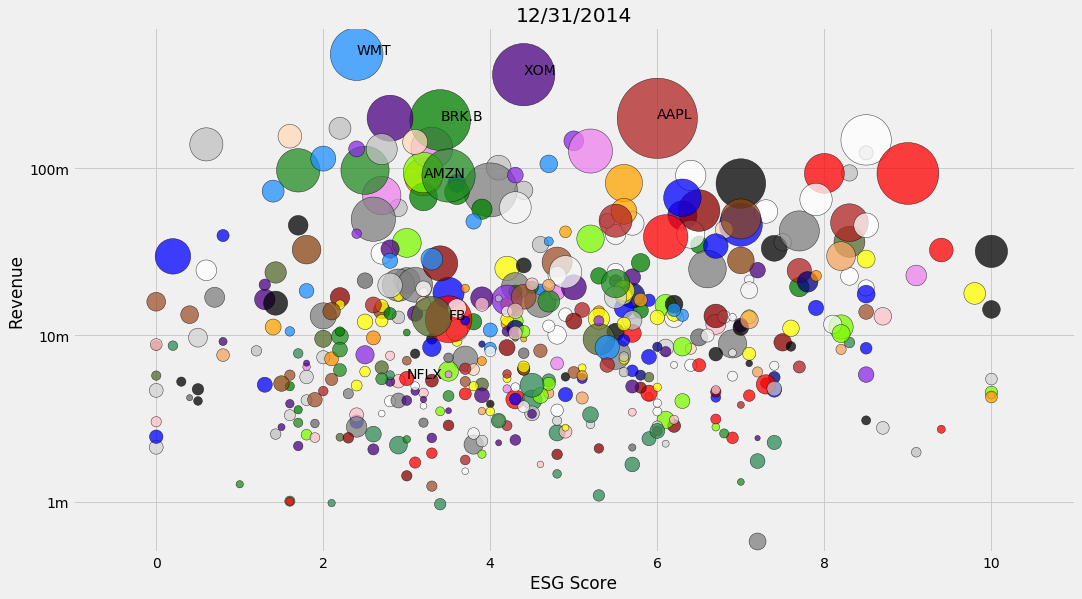

In [29]:
hans_rosling_date('12/31/2014')

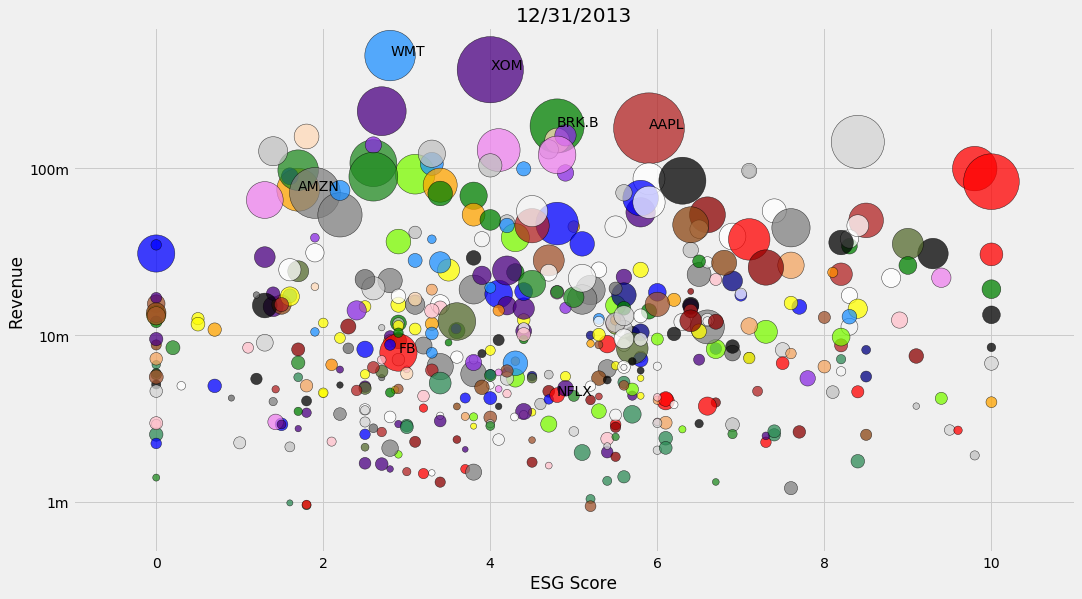

In [30]:
hans_rosling_date('12/31/2013')

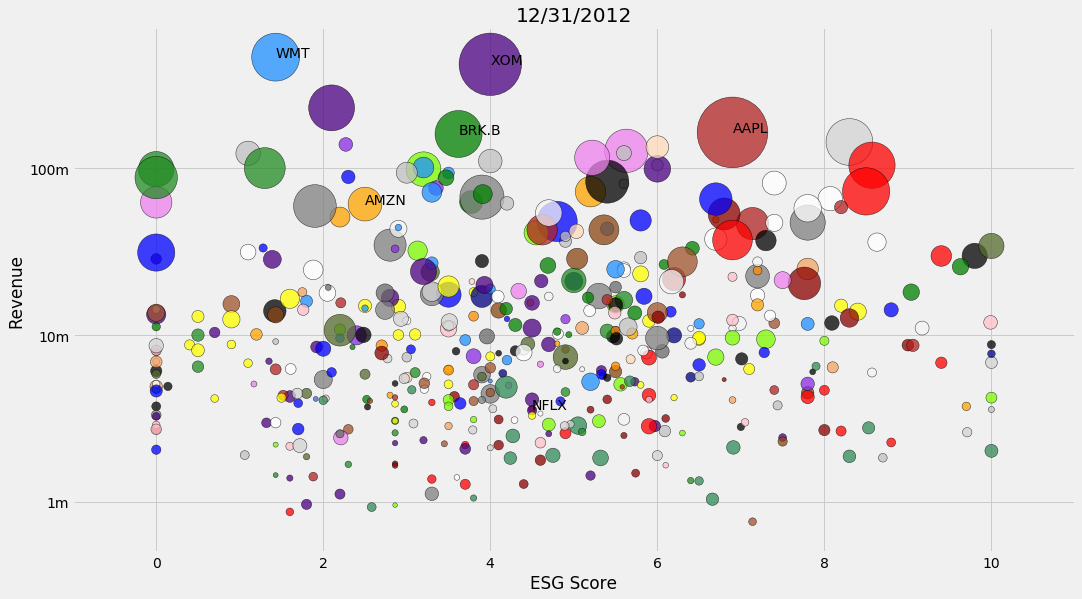

In [31]:
hans_rosling_date('12/31/2012')

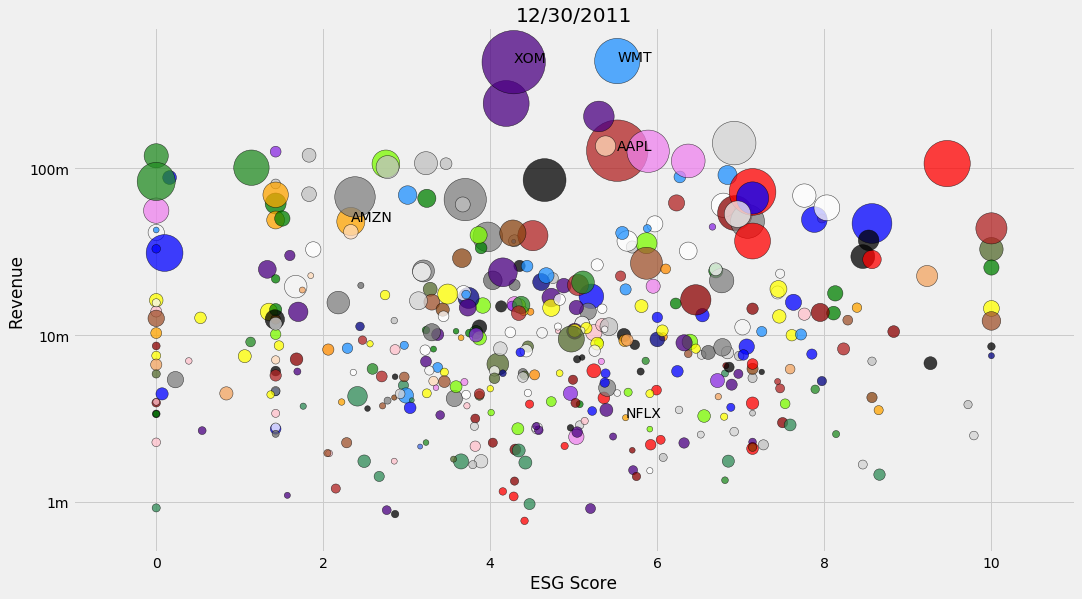

In [32]:
hans_rosling_date('12/30/2011')

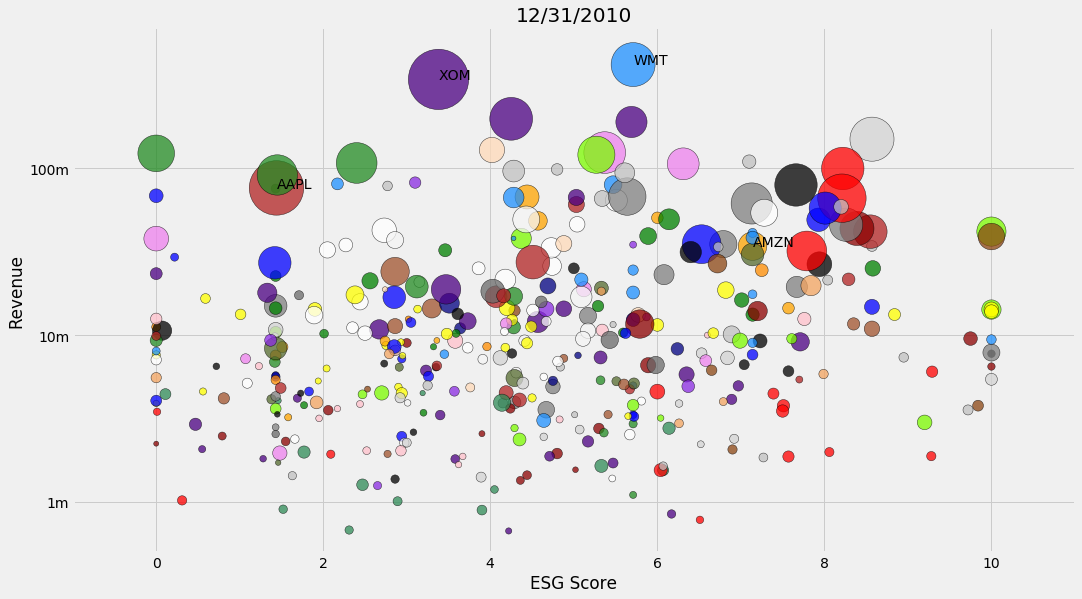

In [33]:
hans_rosling_date('12/31/2010')

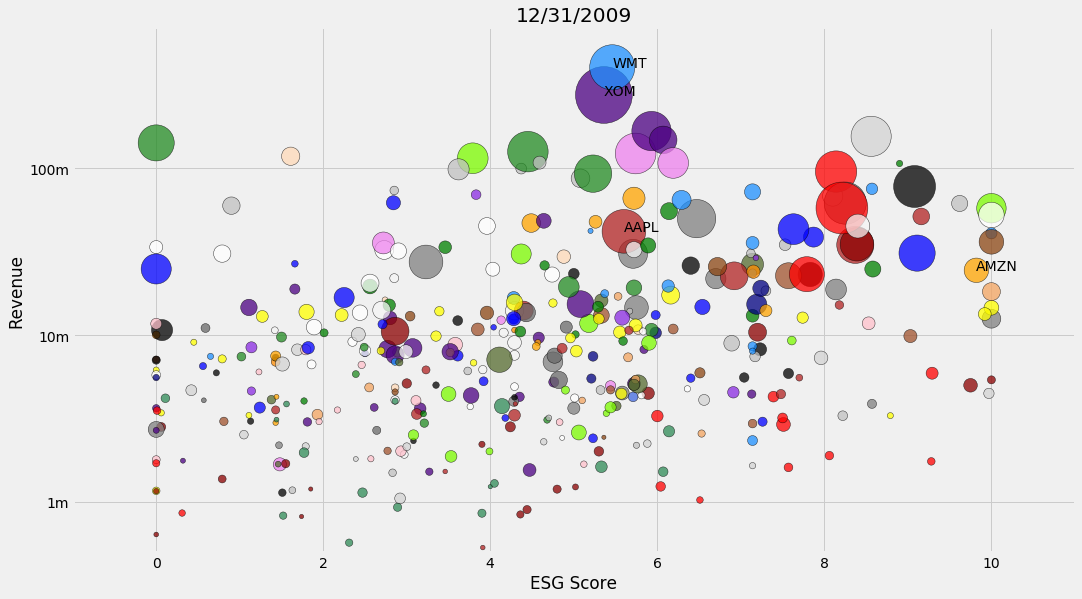

In [34]:
hans_rosling_date('12/31/2009')

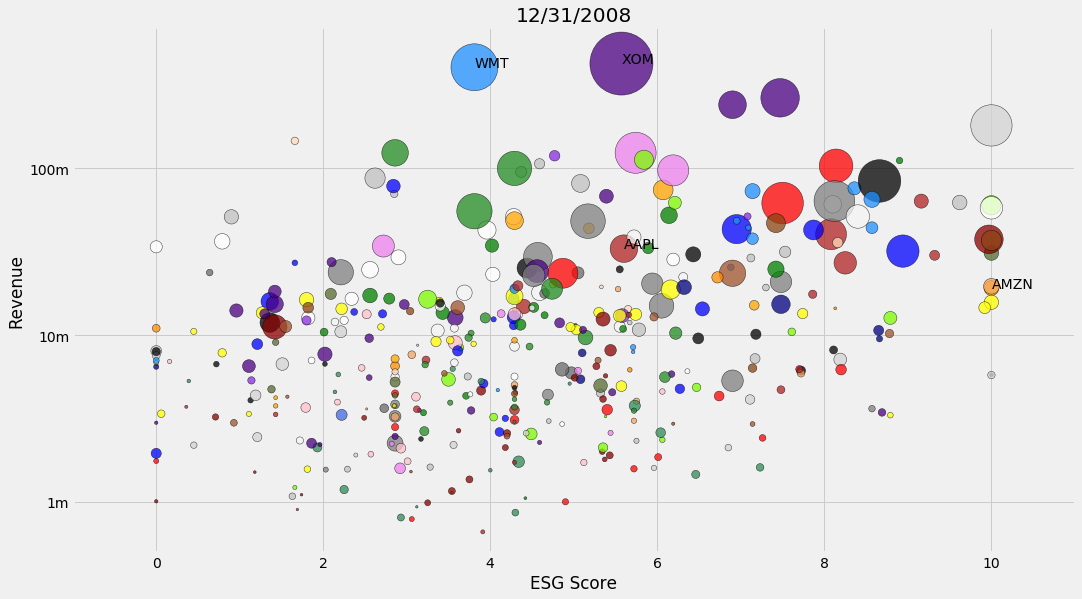

In [35]:
hans_rosling_date('12/31/2008')

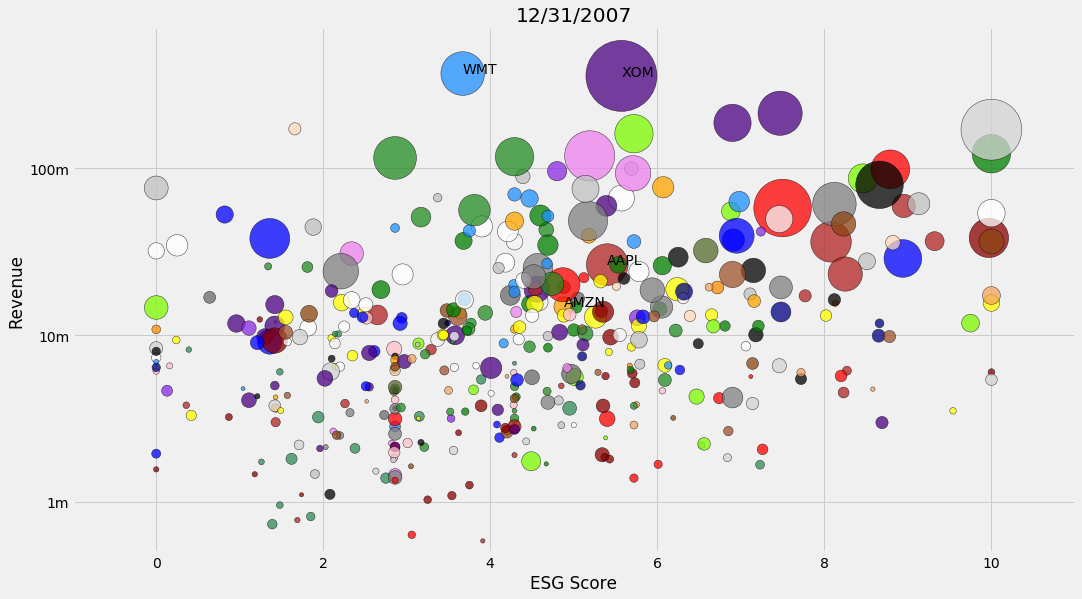

In [36]:
hans_rosling_date('12/31/2007')

In [37]:
hans_rosling.loc[:, 'rbics_econ'].unique()

array(['Non-Energy Materials', 'Healthcare', 'Consumer Cyclicals',
       'Finance', 'Technology', 'Utilities', 'Business Services',
       'Consumer Non-Cyclicals', 'Telecommunications', 'Energy',
       'Industrials', 'Consumer Services'], dtype=object)

In [38]:
hans_rosling.loc[:, 'rbics_sect'].unique()

array(['Manufactured Products', 'Biopharmaceuticals', 'Consumer Retail',
       'Insurance', 'Software and Consulting',
       'Electronic Components and Manufacturing', 'Utilities',
       'Healthcare Services', 'Business Services', 'Healthcare Equipment',
       'Chemical, Plastic and Rubber Materials',
       'Food and Tobacco Production', 'Specialty Finance and Services',
       'Telecommunications', 'Investment Services', 'Upstream Energy',
       'Real Estate', 'Household Services', 'Hardware',
       'Miscellaneous Retail', 'Household Products', 'Banking',
       'Food and Staples Retail', 'Industrial Manufacturing',
       'Consumer Goods', 'Industrial Services', 'Hospitality Services',
       'Media and Publishing Services', 'Mining and Mineral Products',
       'Consumer Vehicles and Parts', 'Downstream and Midstream Energy'], dtype=object)